In [211]:
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [212]:
def plot_pca(X_pca, y):
    plt.figure(figsize=(8,6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.7)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("PCA: 2D Projection of Breast Cancer Data")
    plt.colorbar(label='Malignant (1) / Benign (0)')
    plt.grid(True)
    plt.show()

In [213]:
def PCA(X: pd.DataFrame, n):
    columns = X.columns
    X = X.to_numpy()
    X_np = X.copy()
    X_np = X_np - np.mean(X_np, axis=0)
    covariance = np.cov(X_np, rowvar=False)


    eigenvalues, eigenvectors = np.linalg.eig(covariance)
    sorted_idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_idx]
    eigenvectors = eigenvectors[:, sorted_idx]
    columns = columns[sorted_idx]

    best_features = n
    selected = X_np @ (eigenvectors[:, :best_features])
    columns = columns[:best_features]


    explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
    cumulative = np.cumsum(explained_variance_ratio)
    
    reconstructed = selected @ eigenvectors[:, :best_features].T


    
    return selected, columns, cumulative, eigenvalues[:best_features], eigenvectors[:, :best_features]

In [ ]:
df = pd.read_csv('data/data.csv')
df = df.dropna()
df = df.drop(columns=['id'])


y_df = df['diagnosis']
x_df = df.drop(columns=['diagnosis'])

y_df = y_df.map({ 'B': 0, 'M': 1})

display(y_df)
display(x_df)

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [215]:
xtrain, xtest, ytrain, ytest = train_test_split(x_df, y_df, train_size=0.8, random_state=42, stratify=y_df)


In [216]:
scaler = StandardScaler()

xtrain_scaled = pd.DataFrame(scaler.fit_transform(xtrain), columns=xtrain.columns, index=xtrain.index)
xtest_scaled = pd.DataFrame(scaler.transform(xtest), columns=xtest.columns, index=xtest.index)
display(xtrain_scaled)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
10,0.518559,0.891826,0.424632,0.383925,-0.974744,-0.689772,-0.688586,-0.398175,-1.039155,-0.825056,...,0.579798,1.313242,0.466908,0.445983,-0.596155,-0.634722,-0.610227,-0.235744,0.054566,0.021837
170,-0.516364,-1.639710,-0.541349,-0.542961,0.476219,-0.631834,-0.604281,-0.303075,0.521543,-0.454523,...,-0.582459,-1.690291,-0.611934,-0.587014,0.273582,-0.814844,-0.712666,-0.323208,-0.137576,-0.904402
407,-0.368118,0.455515,-0.388250,-0.402970,-1.432979,-0.383927,-0.342175,-0.765459,-0.850857,-0.226171,...,-0.398622,0.181977,-0.475431,-0.420778,-1.622785,-0.391399,-0.431313,-0.890825,-0.675893,-0.144016
430,0.205285,0.726168,0.400330,0.070612,0.243253,2.203585,2.256094,1.213233,0.818474,0.899791,...,-0.000309,0.274191,0.513776,-0.099482,0.418538,2.865970,2.958619,1.977064,-0.075646,1.728848
27,1.243005,0.194195,1.210377,1.206652,-0.111442,0.051348,0.732962,0.713767,-0.427187,-0.822184,...,1.012835,0.223144,0.938517,0.880910,0.073201,-0.277006,0.327775,0.501859,-0.909322,-0.546249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,-0.317771,-0.232783,-0.389060,-0.377138,-0.431157,-1.228852,-0.778896,-0.499077,-1.260042,-0.586651,...,-0.623312,-0.509626,-0.685458,-0.592515,-1.495309,-1.323042,-1.070826,-0.978888,-1.471458,-1.236106
415,-0.636639,0.408851,-0.640984,-0.627123,0.121524,-0.420324,-0.779754,-0.686756,0.738810,0.026596,...,-0.674377,0.214911,-0.667004,-0.632053,0.448382,-0.232765,-0.749488,-0.492145,0.256237,-0.584819
458,-0.326162,1.332803,-0.389060,-0.387138,-0.860710,-0.986145,-0.945056,-0.791946,-0.535821,-1.181228,...,-0.410878,0.983908,-0.492128,-0.450518,-0.438408,-0.924182,-1.088339,-0.842900,-0.964901,-1.168884
476,0.009489,0.259525,0.007863,-0.114377,-0.467536,0.129341,-0.472432,-0.465023,-1.118819,-0.376969,...,0.020117,0.223144,0.124186,-0.106702,-0.715530,0.552189,-0.113138,0.275711,-0.602847,-0.305460


In [217]:
n_components = 2

pca_out = PCA(xtrain_scaled, n_components)

eigenvectors = pca_out[4]
display(pca_out[1])
xtrain_np = pca_out[0]
ytrain_np = ytrain.to_numpy()

xtest_np = xtest_scaled.to_numpy() @ eigenvectors
ytest_np = ytest.to_numpy()

display(xtrain_np)
display(ytrain_np)

Index(['radius_mean', 'texture_mean'], dtype='object')

array([[-8.75937458e-01, -2.57130887e+00],
       [-2.50512803e+00,  1.92452607e-01],
       [-1.35411680e+00,  4.17850942e-01],
       [ 4.85409144e+00,  3.01757631e+00],
       [ 2.92622452e+00, -1.86654594e+00],
       [ 1.17596996e+01, -7.57381151e+00],
       [-2.16133856e+00,  5.68874521e-01],
       [ 1.24063857e+00,  9.63396648e-01],
       [-1.00949036e+00, -1.60570865e+00],
       [ 2.48457559e+00, -3.89112344e+00],
       [ 2.04013095e+00,  3.11158973e-01],
       [ 9.19934481e+00, -5.61605803e+00],
       [-2.65050527e+00,  1.52509969e+00],
       [ 5.21715943e+00, -1.12978557e-01],
       [-3.02812325e+00, -5.63518810e-01],
       [-1.61256682e+00, -1.55366586e+00],
       [-1.40016136e+00,  1.45612103e+00],
       [-6.76258877e-01,  1.74530793e+00],
       [-3.42972911e+00, -3.87796425e-01],
       [-4.85918556e+00, -2.23108672e+00],
       [-3.50388061e+00, -5.75829885e-01],
       [-8.84852131e-01,  1.67227754e-01],
       [ 3.16687021e+00, -9.74202914e-01],
       [ 1.

array([1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,

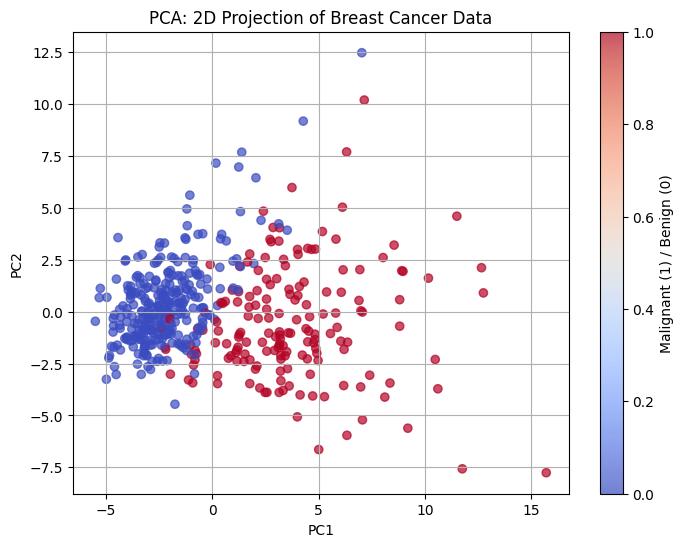

In [218]:
plot_pca(xtrain_np, ytrain_np)

In [219]:
def train(xtrain, ytrain, xtest, ytest, model):
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_resampled, y_resampled = smote.fit_resample(xtrain, ytrain)
    
    pipe = model
    
    pipe.fit(X_resampled, y_resampled)
    
    ypred = pipe.predict(xtest)
    results = {
        "accuracy": accuracy_score(ytest, ypred),
        "f1 score": f1_score(ytest, ypred),
        "precision": precision_score(ytest, ypred),
        "recall": recall_score(ytest, ypred)
    }
    
    return results
    

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

models = [
    LogisticRegression(),
    SVC(kernel='rbf'),
    RandomForestClassifier(),
    GaussianNB()
]

all_results = []

for m in models:
    results = train(xtrain_np, ytrain_np, xtest_np, ytest_np, m)
    all_results.append({
        "model": m.__class__.__name__,
        **results
    })

# Convert to DataFrame
results_df = pd.DataFrame(all_results, index=None)
# Display
display(results_df)


,model,accuracy,f1 score,precision,recall
0,LogisticRegression,0.982456,0.976190,0.976190,0.976190
1,SVC,0.982456,0.976190,0.976190,0.976190
2,RandomForestClassifier,0.956140,0.938272,0.974359,0.904762
3,GaussianNB,0.912281,0.878049,0.900000,0.857143
